<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/solutions/SOLN_L2_Inferential_Statistics_Data_Hunt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations <br> Lab 2: Data Hunt II

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_fundamentals/main/assets/datahunt2.png" width=1000px></img>
</p>

<p align=center>
That's right you heard correctly. It's the data hunt part TWO.
</p>





<a name='x.0'></a>

## Preparing Environment and Importing Data

### Import Packages

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 20.6 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
# our standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import interact

# our stats libraries
import random
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy

# our scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Import and Clean Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
                 "technology_fundamentals/main/assets/truffle_rates.csv")
df = df.loc[df['rate'] > 0]

In [3]:
df.head()

,base_cake,truffle_type,primary_flavor,secondary_flavor,color_group,rate
0,Chiffon,Candy Outer,Cherry Cream Spice,Ginger Beer,Tiffany,0.167097
1,Chiffon,Candy Outer,Cherry Cream Spice,Ginger Beer,Tiffany,0.153827
2,Chiffon,Candy Outer,Cherry Cream Spice,Ginger Beer,Tiffany,0.100299
3,Chiffon,Candy Outer,Cherry Cream Spice,Ginger Beer,Tiffany,0.333008
4,Chiffon,Candy Outer,Cherry Cream Spice,Ginger Beer,Tiffany,0.078108


In [4]:
df.shape

(9210, 6)

## Exploratory Data Analysis

### Q1 Finding Influential Features

Which of the five features (base_cake, truffle_type, primary_flavor, secondary_flavor, color_group) of the truffles is most influential on production rate?

Back your answer with both a visualization of the distributions (boxplot, kernel denisty estimate, histogram, violin plot) and a statistical test (moods median, ANOVA, t-test)

* Be sure: 
    * everything is labeled (can you improve your labels with additional descriptive statistical information e.g. indicate mean, std, etc.)
    * you meet the assumptions of your statistical test

#### Q1.1 Visualization

Use any number of visualizations. Here is an example to get you started:

<AxesSubplot:xlabel='rate', ylabel='Density'>

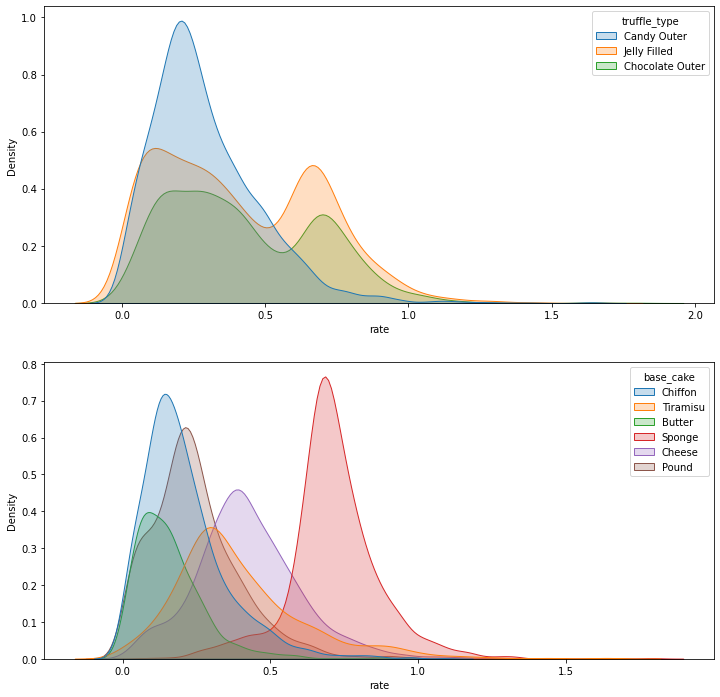

In [5]:
# Example: a KDE of the truffle_type and base_cake columns

fig, ax = plt.subplots(2, 1, figsize=(12,12))
sns.kdeplot(x=df['rate'], hue=df['truffle_type'], fill=True, ax=ax[0])
sns.kdeplot(x=df['rate'], hue=df['base_cake'], fill=True, ax=ax[1])

/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


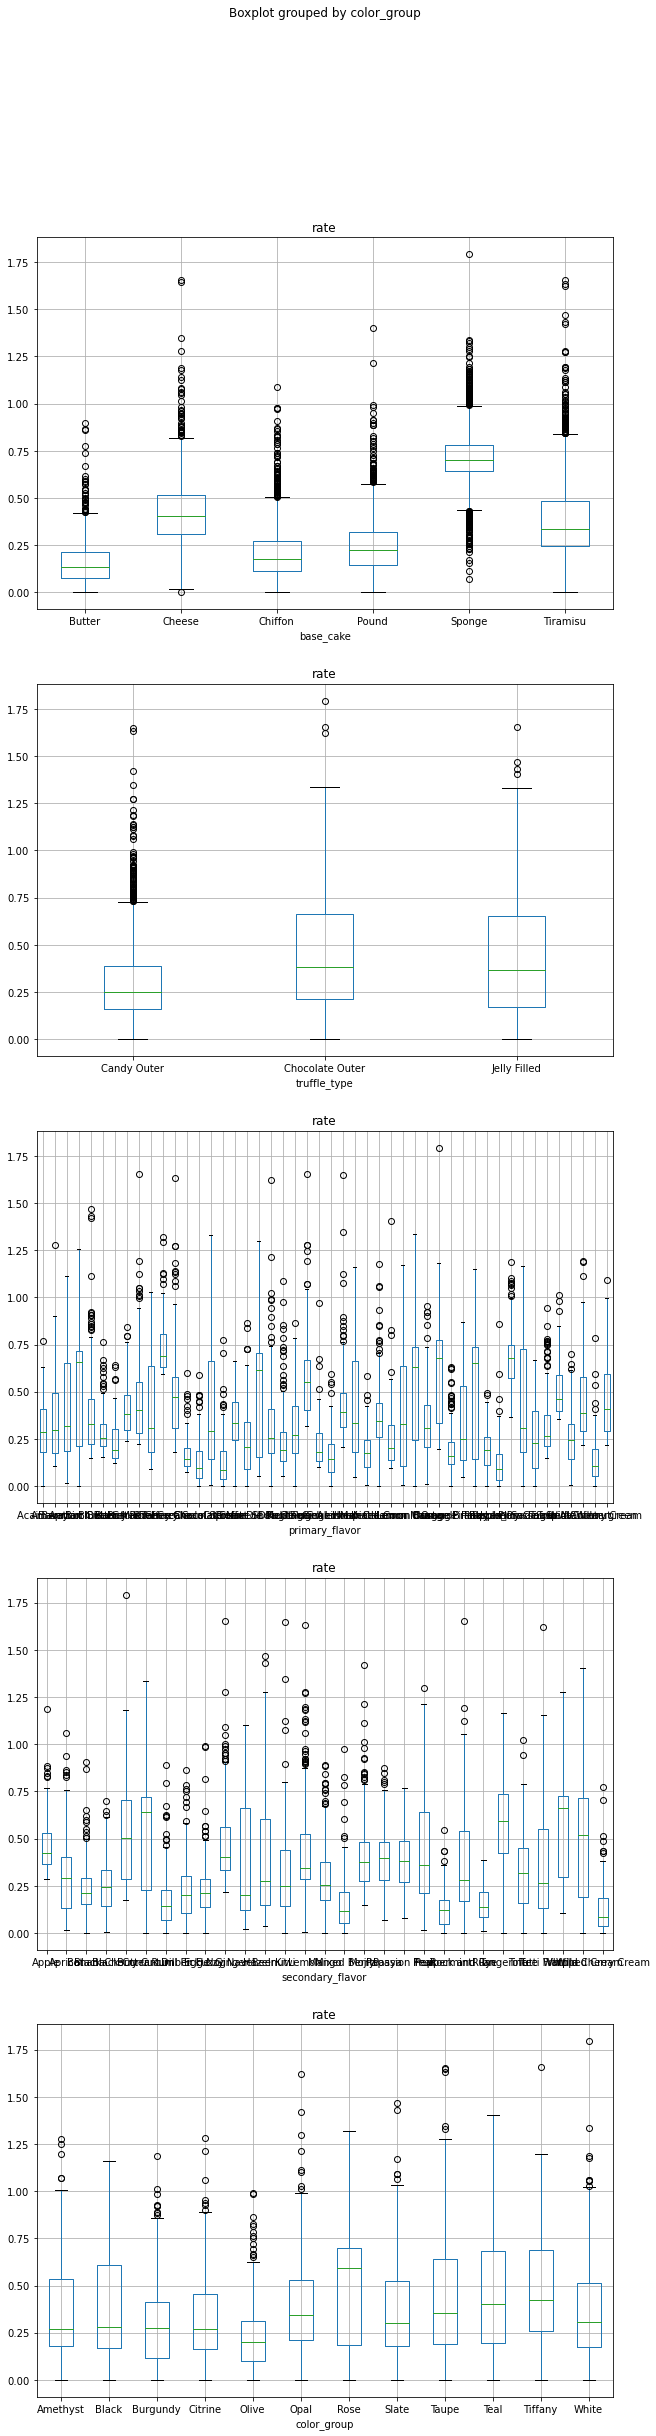

In [9]:
fig, ax = plt.subplots(5, 1, figsize=(10,40))
for idx, col in enumerate(df.columns[:-1]):
    df.boxplot(by=col, column='rate', ax=ax[idx])

#### Q1.2 Statistical Analysis

What statistical tests can you perform to evaluate your hypothesis from the visualizations (maybe you think one particular feature is significant). Here's an ANOVA on the `truffle_type` column to get you started:



In [10]:
model = ols('rate ~ C({})'.format('truffle_type'), data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

,sum_sq,df,F,PR(>F)
C(truffle_type),36.383370,2.0,302.005,9.199611e-128
Residual,554.596254,9207.0,NaN,NaN


Is this P value significant? What is the null hypothesis? How do we check the assumptions of ANOVA? 

> Answer: All groups fail for normal distribution of residuals and homogeneity of variances. So we cannot use ANOVA with this data:

In [19]:
confidence_level = 0.05
for idx, col in enumerate(df.columns[:-1]):
    model = ols('rate ~ C({})'.format(col), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    display(anova_table)
    
    print("Shapiro-Wilk")
    print("\tstatistic={:.2f}, pvalue={:.2e}".format(*stats.shapiro(model.resid)))
    if stats.shapiro(model.resid).pvalue < confidence_level:
      shapiro_rej = True
    print(f"\treject: {shapiro_rej}")
    
    print("Bartlett")
    gb = df.groupby(col)['rate']
    w, pvalue = stats.bartlett(*[gb.get_group(x) for x in gb.groups])
    print("\tstatistic={:.2f}, pvalue={:.2e}".format(w, pvalue))
    if pvalue < confidence_level:
      shapiro_rej = True
    print(f"\treject: {shapiro_rej}")

,sum_sq,df,F,PR(>F)
C(base_cake),331.373550,5.0,2349.684756,0.0
Residual,259.606073,9204.0,NaN,NaN


Shapiro-Wilk
	statistic=0.93, pvalue=0.00e+00
	reject: True
Bartlett
	statistic=619.37, pvalue=1.32e-131
	reject: True


/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,sum_sq,df,F,PR(>F)
C(truffle_type),36.383370,2.0,302.005,9.199611e-128
Residual,554.596254,9207.0,NaN,NaN


Shapiro-Wilk
	statistic=0.96, pvalue=1.37e-42
	reject: True
Bartlett
	statistic=533.02, pvalue=1.80e-116
	reject: True


/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,sum_sq,df,F,PR(>F)
C(primary_flavor),159.105452,47.0,71.815842,0.0
Residual,431.874171,9162.0,NaN,NaN


Shapiro-Wilk
	statistic=0.97, pvalue=6.49e-38
	reject: True
Bartlett


/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


	statistic=1609.00, pvalue=1.85e-306
	reject: True


,sum_sq,df,F,PR(>F)
C(secondary_flavor),115.773877,28.0,79.884192,0.0
Residual,475.205747,9181.0,NaN,NaN


Shapiro-Wilk
	statistic=0.97, pvalue=4.34e-39
	reject: True
Bartlett
	statistic=1224.49, pvalue=3.55e-240
	reject: True


/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,sum_sq,df,F,PR(>F)
C(color_group),33.878491,11.0,50.849974,1.873235e-109
Residual,557.101132,9198.0,NaN,NaN


Shapiro-Wilk
	statistic=0.96, pvalue=1.40e-44
	reject: True
Bartlett
	statistic=298.64, pvalue=1.69e-57
	reject: True


/home/wbeckner/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Instead we might use Moods Median

### Q2 Finding Best and Worst Groups



#### Q2.1 Compare Every Group to the Whole

Of the primary flavors (feature), what 5 flavors (groups) would you recommend Truffletopia discontinue?

Iterate through every level (i.e. pound, cheese, sponge cakes) of every category (i.e. base cake, primary flavor, secondary flavor) and use moods median testing to compare the group distribution to the grand median rate.

In [48]:
moodsdf = pd.DataFrame()
target = 'rate'
for col in df.columns[:-1]:
  for truff in df[col].unique():
    group = df.loc[df[col] == truff][target]
    pop = df.loc[~(df[col] == truff)][target]
    stat, p, m, table = scipy.stats.median_test(group, pop)
    median = np.median(group)
    mean = np.mean(group)
    size = len(group)
    
    moodsdf = pd.concat([moodsdf, 
                              pd.DataFrame([col, truff, 
                                            stat, p, m, mean, median, size,
                                             table]).T])
moodsdf.columns = ['descriptor', 'group', 'pearsons_chi_square', 'p_value', 
                'grand_median', 'group_mean', 'group_median', 'size', 
                'table']
moodsdf['p_value'] = moodsdf['p_value'].astype(float)
print(moodsdf.shape)

(98, 9)


After you've computed a moods median test on every group, filter any data above a significance level of 0.05

In [49]:
moodsdf = moodsdf.loc[(moodsdf['p_value'] < confidence_level)].sort_values('group_median')

moodsdf = moodsdf.sort_values('group_median').reset_index(drop=True)
print(moodsdf.shape)

(83, 9)


Return the groups with the lowest median performance (your table need not look exactly like the one I've created)

In [50]:
moodsdf

,descriptor,group,pearsons_chi_square,p_value,grand_median,group_mean,group_median,size,table
0,secondary_flavor,Wild Cherry Cream,56.867453,4.661980e-14,0.310345,0.139998,0.085628,100,"[[12, 4593], [88, 4517]]"
1,primary_flavor,Coconut,56.867453,4.661980e-14,0.310345,0.139998,0.085628,100,"[[12, 4593], [88, 4517]]"
2,primary_flavor,Pink Lemonade,61.556345,4.302530e-15,0.310345,0.129178,0.092878,85,"[[6, 4599], [79, 4526]]"
3,primary_flavor,Chocolate,51.32026,7.846169e-13,0.310345,0.145727,0.095758,91,"[[11, 4594], [80, 4525]]"
4,primary_flavor,Wild Cherry Cream,43.545249,4.142688e-11,0.310345,0.148964,0.10588,70,"[[7, 4598], [63, 4542]]"
...,...,...,...,...,...,...,...,...,...
78,secondary_flavor,Vanilla,40.484134,1.982191e-10,0.310345,0.559808,0.664252,200,"[[145, 4460], [55, 4550]]"
79,primary_flavor,Orange,60.723646,6.567649e-15,0.310345,0.580579,0.681157,200,"[[155, 4450], [45, 4560]]"
80,primary_flavor,Plum,308.037116,5.845614e-69,0.310345,0.669126,0.681309,300,"[[300, 4305], [0, 4605]]"
81,primary_flavor,Cheesecake,99.085851,2.417896e-23,0.310345,0.745813,0.689802,100,"[[100, 4505], [0, 4605]]"


We would want to cut the following primary flavors. Check to see that you get a similar answer. rip wild cherry cream.

```
['Coconut', 'Pink Lemonade', 'Chocolate', 'Wild Cherry Cream', 'Gingersnap']
```

In [52]:
moodsdf.loc[moodsdf['descriptor'] == 'primary_flavor'][:5]

,descriptor,group,pearsons_chi_square,p_value,grand_median,group_mean,group_median,size,table
1,primary_flavor,Coconut,56.867453,4.661980e-14,0.310345,0.139998,0.085628,100,"[[12, 4593], [88, 4517]]"
2,primary_flavor,Pink Lemonade,61.556345,4.302530e-15,0.310345,0.129178,0.092878,85,"[[6, 4599], [79, 4526]]"
3,primary_flavor,Chocolate,51.32026,7.846169e-13,0.310345,0.145727,0.095758,91,"[[11, 4594], [80, 4525]]"
4,primary_flavor,Wild Cherry Cream,43.545249,4.142688e-11,0.310345,0.148964,0.10588,70,"[[7, 4598], [63, 4542]]"
10,primary_flavor,Gingersnap,131.113519,2.338438e-30,0.310345,0.159268,0.143347,192,"[[17, 4588], [175, 4430]]"


#### Q2.2 Beyond Statistical Testing: Using Reasoning

Let's look at the total profile of the products associated with the five worst primary flavors. Given the number of different products made with any of these flavors, would you alter your answer at all?

> Answer: We would opt to only discontinue the gingersnap, and wild cherry cream flavors. The other flavors, Pink Lemonade, Chocolate, and Coconut may be subject to [Simpson's Paradox](https://www.britannica.com/topic/Simpsons-paradox) since we do not have adequate sampling of them with other categories

In [53]:
# 1. filter df for only bottom five flavors
# 2. groupby all columns besides rate
# 3. describe the rate column.

# by doing this we can evaluate just how much sampling variety we have for the
# worst performing flavors.

bottom_five = ['Coconut', 'Pink Lemonade', 'Chocolate', 'Wild Cherry Cream', 'Gingersnap']
df.loc[df['primary_flavor'].isin(bottom_five)].groupby(list(df.columns[:-1]))['rate'].describe()

count  \
base_cake truffle_type    primary_flavor    secondary_flavor  color_group          
Butter    Jelly Filled    Pink Lemonade     Butter Rum        Rose          85.0   
Chiffon   Candy Outer     Wild Cherry Cream Rock and Rye      Olive         17.0   
          Chocolate Outer Gingersnap        Dill Pickle       Burgundy      59.0   
          Jelly Filled    Chocolate         Tutti Frutti      Burgundy      91.0   
Pound     Candy Outer     Coconut           Wild Cherry Cream Taupe        100.0   
          Chocolate Outer Gingersnap        Rock and Rye      Black         67.0   
          Jelly Filled    Gingersnap        Kiwi              Taupe         66.0   
                          Wild Cherry Cream Mango             Taupe         53.0   

                                                                               mean  \
base_cake truffle_type    primary_flavor    secondary_flavor  color_group             
Butter    Jelly Filled    Pink Lemonade     Butter Rum        Rose         0.129178   
Chiffon   Candy Outer     Wild Cherry Cream Rock and Rye      Olive        0.094287   
          Chocolate Outer Gingersnap        Dill Pickle       Burgundy     0.133272   
          Jelly Filled    Chocolate         Tutti Frutti      Burgundy     0.145727   
Pound     Candy Outer     Coconut           Wild Cherry Cream Taupe        0.139998   
          Chocolate Outer Gingersnap        Rock and Rye      Black        0.156160   
          Jelly Filled    Gingersnap        Kiwi              Taupe        0.185662   
                          Wild Cherry Cream Mango             Taupe        0.166502   

                                                                                std  \
base_cake truffle_type    primary_flavor    secondary_flavor  color_group             
Butter    Jelly Filled    Pink Lemonade     Butter Rum        Rose         0.137326   
Chiffon   Candy Outer     Wild Cherry Cream Rock and Rye      Olive        0.059273   
          Chocolate Outer Gingersnap        Dill Pickle       Burgundy     0.080414   
          Jelly Filled    Chocolate         Tutti Frutti      Burgundy     0.135230   
Pound     Candy Outer     Coconut           Wild Cherry Cream Taupe        0.147723   
          Chocolate Outer Gingersnap        Rock and Rye      Black        0.110666   
          Jelly Filled    Gingersnap        Kiwi              Taupe        0.132272   
                          Wild Cherry Cream Mango             Taupe        0.160090   

                                                                                min  \
base_cake truffle_type    primary_flavor    secondary_flavor  color_group             
Butter    Jelly Filled    Pink Lemonade     Butter Rum        Rose         0.000061   
Chiffon   Candy Outer     Wild Cherry Cream Rock and Rye      Olive        0.010464   
          Chocolate Outer Gingersnap        Dill Pickle       Burgundy     0.021099   
          Jelly Filled    Chocolate         Tutti Frutti      Burgundy     0.000033   
Pound     Candy Outer     Coconut           Wild Cherry Cream Taupe        0.000705   
          Chocolate Outer Gingersnap        Rock and Rye      Black        0.002846   
          Jelly Filled    Gingersnap        Kiwi              Taupe        0.000014   
                          Wild Cherry Cream Mango             Taupe        0.001412   

                                                                                25%  \
base_cake truffle_type    primary_flavor    secondary_flavor  color_group             
Butter    Jelly Filled    Pink Lemonade     Butter Rum        Rose         0.032887   
Chiffon   Candy Outer     Wild Cherry Cream Rock and Rye      Olive        0.053976   
          Chocolate Outer Gingersnap        Dill Pickle       Burgundy     0.069133   
          Jelly Filled    Chocolate         Tutti Frutti      Burgundy     0.044847   
Pound     Candy Outer     Coconut           Wild Cherry Cream Taupe        0.036004   
          Ch

#### Q2.3 The Jelly Filled Conundrum

Your boss notices the Jelly filled truffles are being produced much faster than the candy outer truffles and suggests expanding into this product line. What is your response? Use the visualization tool below to help you think about this problem, then create any visualizations or analyses of your own.

[sunburst charts](https://plotly.com/python/sunburst-charts/)

> Answer: Another case of Simpson's Paradox. The real boost is due to the sponge cake base cake type. It is simply that we have been producing more of the sponge cakes that are jelly filled. In fact, jelly filled has a slightly worse performance than chocolate outer when paired with sponge cake. This can be visually verified by switching the menu item in `interact` to observe the effect of Jelly Filled on all its constituent products

In [54]:
def sun(path=[['base_cake', 'truffle_type', 'primary_flavor', 'secondary_flavor', 'color_group'],
              ['truffle_type', 'base_cake', 'primary_flavor', 'secondary_flavor', 'color_group']]):
  fig = px.sunburst(df, path=path, 
                    color='rate', 
                    color_continuous_scale='viridis',
                    )

  fig.update_layout(
      margin=dict(l=20, r=20, t=20, b=20),
      height=650
  )
  fig.show()

In [55]:
interact(sun)

interactive(children=(Dropdown(description='path', options=(['base_cake', 'truffle_type', 'primary_flavor', 's…

<function __main__.sun(path=[['base_cake', 'truffle_type', 'primary_flavor', 'secondary_flavor', 'color_group'], ['truffle_type', 'base_cake', 'primary_flavor', 'secondary_flavor', 'color_group']])>

This negative impact of Jelly filled is still obscured in the median analysis:

In [58]:
moodsdf.loc[moodsdf['descriptor'] == 'truffle_type']

,descriptor,group,pearsons_chi_square,p_value,grand_median,group_mean,group_median,size,table
32,truffle_type,Candy Outer,369.023049,3.054270e-82,0.310345,0.289822,0.249572,3352,"[[1232, 3373], [2120, 2485]]"
52,truffle_type,Jelly Filled,95.107432,1.803284e-22,0.310345,0.414813,0.365576,3450,"[[1952, 2653], [1498, 3107]]"
55,truffle_type,Chocolate Outer,105.424685,9.857421e-25,0.310345,0.427535,0.380527,2408,"[[1421, 3184], [987, 3618]]"


So we must account for the affect of the sponge cake:

                     rate
truffle_type             
Candy Outer      0.289822
Chocolate Outer  0.320189
Jelly Filled     0.266877


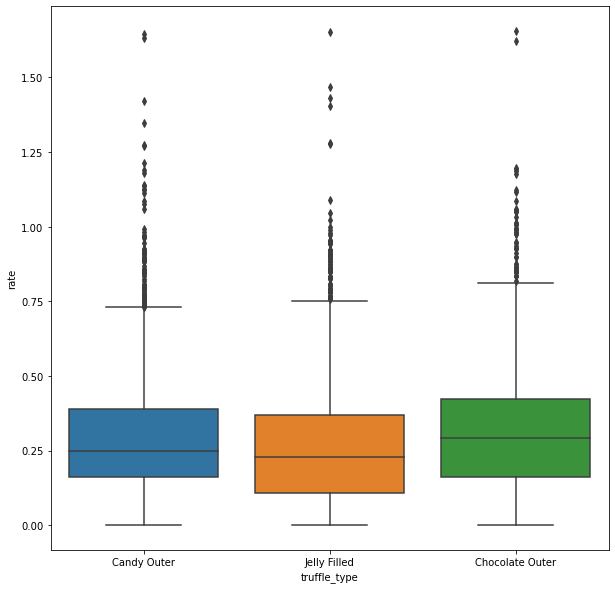

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='truffle_type', y='rate', data=df.loc[~(df['base_cake'] == 'Sponge')])
print(df.loc[~(df['base_cake'] == 'Sponge')].groupby('truffle_type')[['rate']].mean())

                     rate
truffle_type             
Chocolate Outer  0.751005
Jelly Filled     0.692193


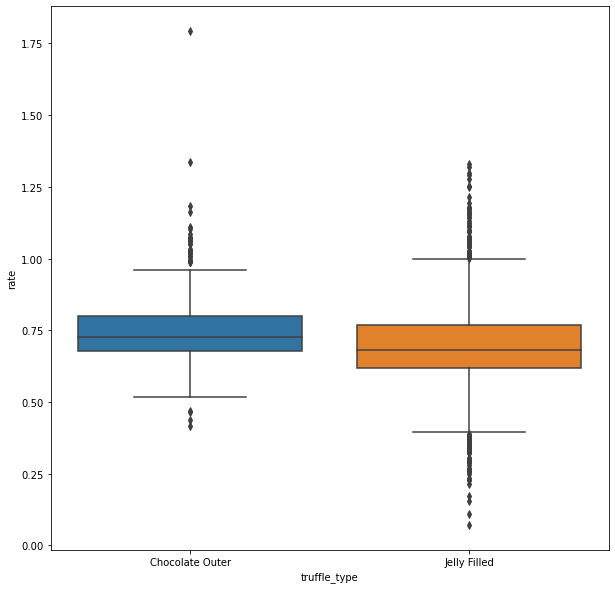

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='truffle_type', y='rate', data=df.loc[(df['base_cake'] == 'Sponge')])
print(df.loc[(df['base_cake'] == 'Sponge')].groupby('truffle_type')[['rate']].mean())